In [1]:
#import libraries
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#import datasets
covid = pd.read_csv("covid.csv")
happiness = pd.read_csv("happiness.csv")

In [3]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [5]:
#merge all datasets
covid_happiness = pd.merge(covid, happiness, left_on = "location", right_on = "Country name").drop("location", axis = 1)

order = [0,58,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
        40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77]
covid_happiness = covid_happiness[covid_happiness.columns[order]]

covid_happiness.head()

,iso_code,Country name,continent,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,AFG,Afghanistan,Asia,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
1,AFG,Afghanistan,Asia,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
2,AFG,Afghanistan,Asia,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
3,AFG,Afghanistan,Asia,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236
4,AFG,Afghanistan,Asia,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.0,0.135235,0.001226,1.507236


In [6]:
#lowest happiness
happiness.sort_values(by = ["Ladder score"]).iloc[:5]
l1 = covid_happiness.loc[covid_happiness["Country name"] == "Afghanistan"]
l2 = covid_happiness.loc[covid_happiness["Country name"] == "South Sudan"]
l3 = covid_happiness.loc[covid_happiness["Country name"] == "Zimbabwe"]
l4 = covid_happiness.loc[covid_happiness["Country name"] == "Rwanda"]
l5 = covid_happiness.loc[covid_happiness["Country name"] == "Central African Republic"]
l_countries = pd.concat([l1, l2, l3, l4, l5], ignore_index = True)

#highest happiness
happiness.sort_values(by = ["Ladder score"]).iloc[-5:]
h1 = covid_happiness.loc[covid_happiness["Country name"] == "Norway"]
h2 = covid_happiness.loc[covid_happiness["Country name"] == "Iceland"]
h3 = covid_happiness.loc[covid_happiness["Country name"] == "Switzerland"]
h4 = covid_happiness.loc[covid_happiness["Country name"] == "Denmark"]
h5 = covid_happiness.loc[covid_happiness["Country name"] == "Finland"]
h_countries = pd.concat([h1, h2, h3, h4, h5], ignore_index = True)

In [7]:
#countries of interest
US = covid_happiness.loc[covid_happiness["Country name"] == "United States"]
SA = covid_happiness.loc[covid_happiness["Country name"] == "South Africa"]
UK = covid_happiness.loc[covid_happiness["Country name"] == "United Kingdom"]
i_countries = pd.concat([US, SA, UK], ignore_index = True)

In [8]:
#covid cases visulizations
#sns.relplot(data = l_countries, x = "date", y = "total_cases", hue = "Country name", kind = "line")
#sns.relplot(data = h_countries, x = "date", y = "total_cases", hue = "Country name", kind = "line")
#sns.relplot(data = i_countries, x = "date", y = "total_cases", hue = "Country name", kind = "line")

In [9]:
#dealth visulizations
#sns.relplot(data = l_countries, x = "date", y = "total_deaths", hue = "Country name", kind = "line")
#sns.relplot(data = h_countries, x = "date", y = "total_deaths", hue = "Country name", kind = "line")
#sns.relplot(data = i_countries, x = "date", y = "total_deaths", hue = "Country name", kind = "line")

In [10]:
#sorting into needed data
gen = covid_happiness.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

In [11]:
#general linear regression
data = gen[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
cases_target = gen["total_cases_per_million"].values

cases_model = LinearRegression()
cases_model.fit(X = data, y = cases_target)

print(cases_model.coef_)

gen["pred_total_cases_per_million"] = cases_model.predict(data)
gen[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(gen["total_cases_per_million"].values, gen["pred_total_cases_per_million"].values),
     "r^2:", r2_score(gen["total_cases_per_million"].values, gen["pred_total_cases_per_million"].values))

[ 1.31753845e+03  6.88928166e+02 -4.78152633e+00  2.93648028e-01]
MSE: 533062441.5987273 r^2: 0.43257254126763245


<AxesSubplot:xlabel='median_age', ylabel='total_cases_per_million'>

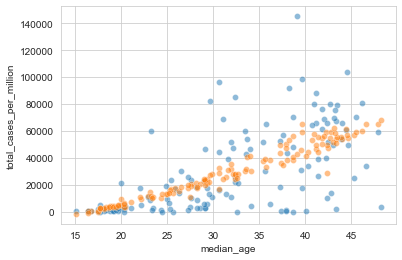

In [12]:
sns.scatterplot(data = gen, x = "median_age", y = "total_cases_per_million", alpha = 0.5)
sns.scatterplot(data = gen, x = "median_age", y = "pred_total_cases_per_million", alpha = 0.5)

<AxesSubplot:xlabel='aged_65_older', ylabel='total_cases_per_million'>

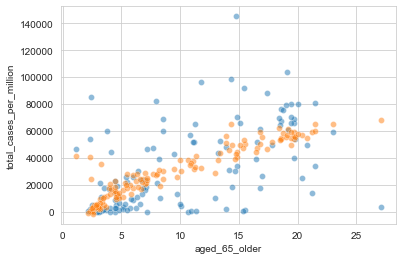

In [13]:
sns.scatterplot(data = gen, x = "aged_65_older", y = "total_cases_per_million", alpha = 0.5)
sns.scatterplot(data = gen, x = "aged_65_older", y = "pred_total_cases_per_million", alpha = 0.5)

<AxesSubplot:xlabel='population_density', ylabel='total_cases_per_million'>

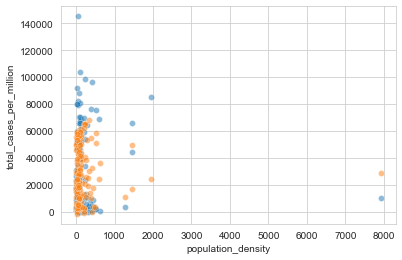

In [14]:
sns.scatterplot(data = gen, x = "population_density", y = "total_cases_per_million", alpha = 0.5)
sns.scatterplot(data = gen, x = "population_density", y = "pred_total_cases_per_million", alpha = 0.5)

<AxesSubplot:xlabel='gdp_per_capita', ylabel='total_cases_per_million'>

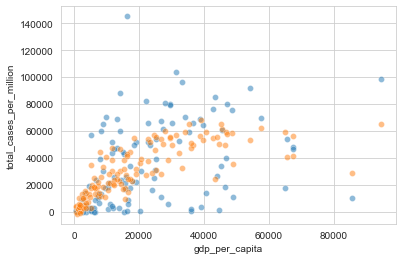

In [15]:
sns.scatterplot(data = gen, x = "gdp_per_capita", y = "total_cases_per_million", alpha = 0.5)
sns.scatterplot(data = gen, x = "gdp_per_capita", y = "pred_total_cases_per_million", alpha = 0.5)

In [16]:
#low linear regression
l = l_countries.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

l_data = l[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
l_target = l["total_cases_per_million"].values

l_model = LinearRegression()
l_model.fit(X = l_data, y = l_target)

print(l_model.coef_)

l["pred_total_cases_per_million"] = l_model.predict(l_data)
l[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(l["total_cases_per_million"].values, l["pred_total_cases_per_million"].values),
     "r^2:", r2_score(l["total_cases_per_million"].values, l["pred_total_cases_per_million"].values))

[ 8.74738096e+02  2.93035765e+02 -3.17003859e+00  5.09938862e-01]
MSE: 5.785611396925583e-22 r^2: 1.0


In [17]:
#high linear regression
h = h_countries.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

h_data = h[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
h_target = h["total_cases_per_million"].values

h_model = LinearRegression()
h_model.fit(X = h_data, y = h_target)

print(h_model.coef_)

h["pred_total_cases_per_million"] = h_model.predict(h_data)
h[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(h["total_cases_per_million"].values, h["pred_total_cases_per_million"].values),
     "r^2:", r2_score(h["total_cases_per_million"].values, h["pred_total_cases_per_million"].values))

[ 1.05507642e+04 -9.68218249e+03  1.49002526e+02 -2.34182595e-01]
MSE: 2.946627459024363e-16 r^2: 1.0


In [18]:
#interested linear regression
i = i_countries.groupby("Country name").max("total_cases").reset_index().dropna(subset =
      ["median_age", "aged_65_older", "population_density", "gdp_per_capita"])

i_data = i[["median_age", "aged_65_older", "population_density", "gdp_per_capita"]].values
i_target = i["total_cases_per_million"].values

i_model = LinearRegression()
i_model.fit(X = i_data, y = i_target)

print(i_model.coef_)

i["pred_total_cases_per_million"] = i_model.predict(i_data)
i[["Country name", "total_cases_per_million", "pred_total_cases_per_million"]].head()

print("MSE:", mean_squared_error(i["total_cases_per_million"].values, i["pred_total_cases_per_million"].values),
     "r^2:", r2_score(i["total_cases_per_million"].values, i["pred_total_cases_per_million"].values))

[ -0.58192446  -0.60810152 -21.59013434   1.56673626]
MSE: 3.970466940254533e-23 r^2: 1.0
